**The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning. Dataset: Dataset for Data preprocessing Key Components to be fulfilled: Data Exploration: Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns. Data Cleaning: Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers. Replace the value 0 in age as NaN Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode) Data Analysis: Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually Data Encoding: Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms. Feature Scaling: After the process of encoding, perform the scaling of the features using standardscaler and minmaxscale**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn 
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [9]:
df.shape

(148, 6)

In [12]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [19]:
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [20]:
df.describe(include=object)

,Company,Place,Country
count,140,134,148
unique,6,11,1
top,TCS,Mumbai,India
freq,53,37,148


**#list down the unique values in each feature and find its length**

In [21]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [38]:
Unique_Companies= []
for column in df.columns:
    Unique_values= df[column].unique()
    length_of_column = len(df[column].unique())
    Unique_Companies.append({'Column': column, 'Unique Values': Unique_values,'length':length_of_column})
print(Unique_Companies)
    

[{'Column': 'Company', 'Unique Values': array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object), 'length': 7}, {'Column': 'Age', 'Unique Values': array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.]), 'length': 30}, {'Column': 'Salary', 'Unique Values': array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.]), 'length': 41}, {'Column': 'Place', 'Unique Values': array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object), 'length': 12}, {'Column': 'Cou

In [39]:
Unique = pd.DataFrame(Unique_Companies)
Unique

,Column,Unique Values,length
0,Company,"[TCS, Infosys, CTS, nan, Tata Consultancy Serv...",7
1,Age,"[20.0, 30.0, 35.0, 40.0, 23.0, nan, 34.0, 45.0...",30
2,Salary,"[nan, 2300.0, 3000.0, 4000.0, 5000.0, 6000.0, ...",41
3,Place,"[Chennai, Mumbai, Calcutta, Delhi, Podicherry,...",12
4,Country,[India],1
5,Gender,"[0, 1]",2


**#Data Cleaning**

In [41]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [42]:
df.isnull().sum()/len(df)*100

Company     5.405405
Age        12.162162
Salary     16.216216
Place       9.459459
Country     0.000000
Gender      0.000000
dtype: float64

**Replacing NAN in Age with 0**

In [46]:
df.loc[df['Age']==0,'Age']=np.nan
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [49]:
df['Age'].isnull().sum()

np.int64(24)

In [51]:
df['Age']=df['Age'].fillna(df.Age.mean())

In [52]:
df['Age'].isnull().sum()

np.int64(0)

In [55]:
df['Salary']=df['Salary'].fillna(df.Salary.median())

In [56]:
df['Salary'].isnull().sum()

np.int64(0)

**#Remove the duplicates**

In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


**#Identifying the outliers**

<Axes: >

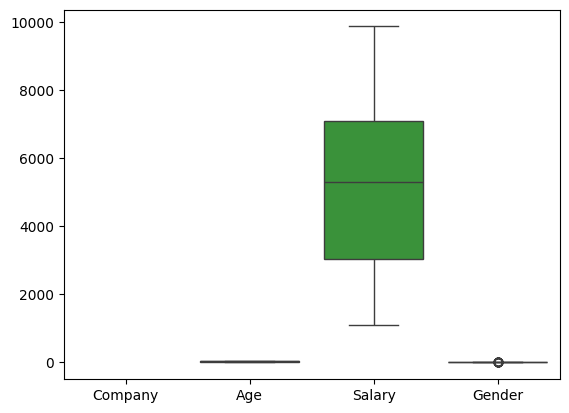

In [68]:
sns.boxplot(data=df)

In [78]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3)

3045.0 7084.0


In [74]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-3013.5
13142.5


In [76]:
print(df.Salary.mean())

5288.10248655914


In [79]:
new_df =df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
print("Data after removing outliers:")
print(new_df)

Data after removing outliers:
    Company   Age       Salary     Place Country  Gender
0      None  20.0  5312.467742   Chennai   India       0
1      None  30.0  5312.467742    Mumbai   India       0
2      None  35.0  2300.000000  Calcutta   India       0
3      None  40.0  3000.000000     Delhi   India       0
4      None  23.0  4000.000000    Mumbai   India       0
..      ...   ...          ...       ...     ...     ...
142    None  22.0  8202.000000    Mumbai   India       0
143    None  33.0  9024.000000  Calcutta   India       1
145    None  44.0  4034.000000     Delhi   India       1
146    None  33.0  5034.000000    Mumbai   India       1
147    None  22.0  8202.000000    Cochin   India       0

[144 rows x 6 columns]


**#Data Analysis**

 **Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually**

In [82]:
new_df1= df[(df['Salary']<5000)&(df['Age']>40)]
new_df1

,Company,Age,Salary,Place,Country,Gender
21,None,50.0,3184.0,Delhi,India,0
32,None,45.0,4034.0,Calcutta,India,0
39,None,41.0,3000.0,Mumbai,India,0
50,None,41.0,3000.0,Chennai,India,0
57,None,51.0,3184.0,Hyderabad,India,0
68,None,43.0,4034.0,Mumbai,India,0
75,None,44.0,3000.0,Cochin,India,0
86,None,41.0,3000.0,Delhi,India,0
93,None,54.0,3184.0,Mumbai,India,0
104,None,44.0,4034.0,Delhi,India,0


In [88]:
print(new_df1['Salary'].mean().sum().round(2))

3411.53


In [90]:
new_df1.describe()

,Age,Salary,Gender
count,15.000000,15.000000,15.000000
mean,45.333333,3411.533333,0.066667
std,3.994043,462.651808,0.258199
min,41.000000,3000.000000,0.000000
25%,43.500000,3016.500000,0.000000
50%,44.000000,3184.000000,0.000000
75%,47.500000,4034.000000,0.000000
max,54.000000,4034.000000,1.000000


Text(0.5, 1.0, 'Age vs Salary')

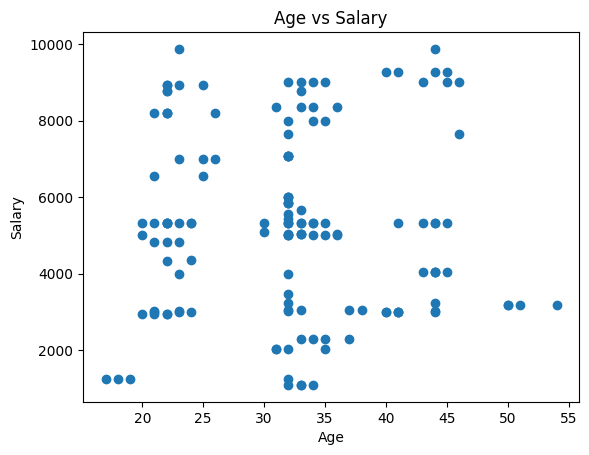

In [95]:
plt.scatter(df['Age'],df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title("Age vs Salary")


***#Count the number of people from each place and represent it visually***

In [99]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [103]:
Count_of_the_pepole=df.Place.value_counts()
Count_of_the_pepole

Place
Mumbai        34
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

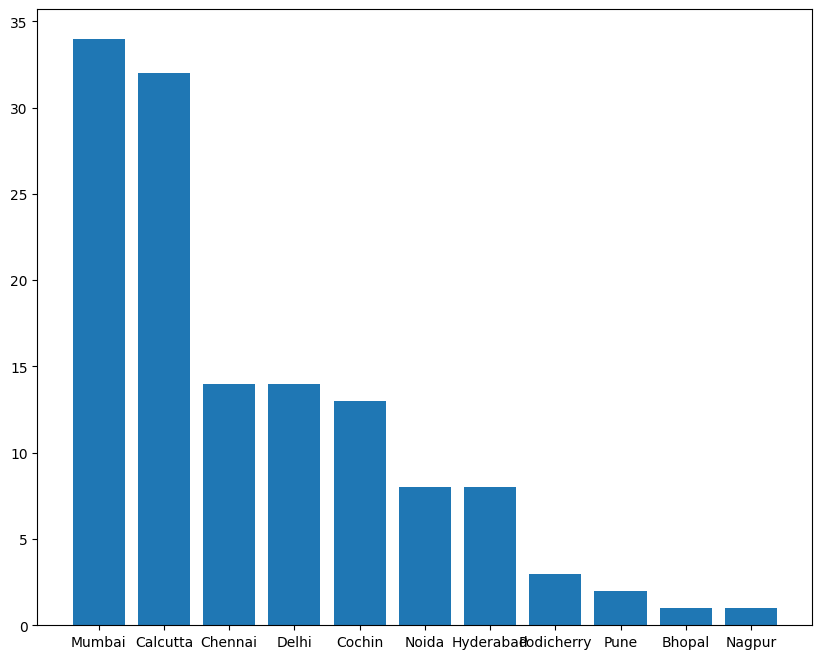

In [105]:
plt.figure(figsize= (10,8))
plt.bar(Count_of_the_pepole.index,Count_of_the_pepole.values)
plt.xlabel=("place")
plt.ylabel=("Count")
plt.title=("Place Vs Count")

**Data Encoding**

In [110]:
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [113]:
Object_columns = df.select_dtypes(include=['object'])
Object_columns

,Company,Place,Country
0,None,Chennai,India
1,None,Mumbai,India
2,None,Calcutta,India
3,None,Delhi,India
4,None,Mumbai,India
...,...,...,...
142,None,Mumbai,India
143,None,Calcutta,India
145,None,Delhi,India
146,None,Mumbai,India


In [117]:
data = df.copy()
from sklearn.preprocessing import OneHotEncoder

In [118]:
encoded_data=pd.get_dummies(df, columns=["Company","Place","Country"])
encoded_data

,Age,Salary,Gender,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,20.0,5312.467742,0,False,False,True,False,False,False,False,False,False,False,False,True
1,30.0,5312.467742,0,False,False,False,False,False,False,True,False,False,False,False,True
2,35.0,2300.000000,0,False,True,False,False,False,False,False,False,False,False,False,True
3,40.0,3000.000000,0,False,False,False,False,True,False,False,False,False,False,False,True
4,23.0,4000.000000,0,False,False,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.000000,0,False,False,False,False,False,False,True,False,False,False,False,True
143,33.0,9024.000000,1,False,True,False,False,False,False,False,False,False,False,False,True
145,44.0,4034.000000,1,False,False,False,False,True,False,False,False,False,False,False,True
146,33.0,5034.000000,1,False,False,False,False,False,False,True,False,False,False,False,True


**Lable Encoding**

In [119]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in ["Company","Place","Country"]:
    df[column] = label_encoder.fit_transform(df[column])
print(df.head())

   Company   Age       Salary  Place  Country  Gender
0        0  20.0  5312.467742      2        0       0
1        0  30.0  5312.467742      6        0       0
2        0  35.0  2300.000000      1        0       0
3        0  40.0  3000.000000      4        0       0
4        0  23.0  4000.000000      6        0       0


**Spliting Dataset**

In [121]:
numerical_data=df.select_dtypes(include=['int64', 'float64']).columns

In [122]:
from sklearn.model_selection import train_test_split
X = df.drop('Salary', axis=1)  
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
print(X_train)
print(X_test)

     Company        Age  Place  Country  Gender
125        0  33.000000     11        0       1
31         0  20.000000      6        0       0
99         0  44.000000      9        0       1
36         0  32.000000      8        0       0
16         0  23.000000      9        0       0
..       ...        ...    ...      ...     ...
71         0  34.000000      6        0       1
107        0  31.959677      2        0       1
14         0  40.000000      1        0       0
93         0  54.000000      6        0       0
103        0  22.000000      1        0       0

[115 rows x 5 columns]
     Company        Age  Place  Country  Gender
118        0  22.000000     11        0       0
19         0  32.000000      6        0       0
82         0  22.000000     10        0       0
98         0  33.000000      4        0       1
56         0  38.000000      8        0       0
12         0  45.000000      2        0       0
135        0  40.000000      1        0       1
65         0  31

In [124]:
print(y_train)
print(y_test)

125    5654.000000
31     2934.000000
99     9284.000000
36     5312.467742
16     3030.000000
          ...     
71     9024.000000
107    9024.000000
14     3000.000000
93     3184.000000
103    2934.000000
Name: Salary, Length: 115, dtype: float64
118    5312.467742
19     5312.467742
82     5312.467742
98     8345.000000
56     3045.000000
12     5312.467742
135    9284.000000
65     2034.000000
66     5312.467742
18     5312.467742
51     3000.000000
78     6000.000000
95     5835.000000
136    5312.467742
101    2034.000000
64     6543.000000
27     9284.000000
69     5034.000000
126    5009.000000
73     5312.467742
11     1089.000000
120    5312.467742
111    3234.000000
114    5555.000000
55     7654.000000
45     9000.000000
9      9000.000000
4      4000.000000
26     8345.000000
Name: Salary, dtype: float64


**##Feature scaling
Standardization**

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Standard Scaled Training:\n", X_train_scaled)
print("Standard Scaled Testing:\n", X_test_scaled)

Standard Scaled Training:
 [[ 0.          0.14447994  1.99922805  0.          1.85015592]
 [ 0.         -1.41298311  0.43093865  0.         -0.54049499]
 [ 0.          1.4623333   1.37191229  0.          1.85015592]
 [ 0.          0.02467509  1.05825441  0.         -0.54049499]
 [ 0.         -1.05356856  1.37191229  0.         -0.54049499]
 [ 0.         -1.05356856  0.43093865  0.         -0.54049499]
 [ 0.         -1.17337341 -1.13735075  0.         -0.54049499]
 [ 0.         -1.17337341 -0.51003499  0.         -0.54049499]
 [ 0.          0.01984425  1.99922805  0.         -0.54049499]
 [ 0.          0.14447994  1.05825441  0.         -0.54049499]
 [ 0.          0.14447994  0.11728077  0.         -0.54049499]
 [ 0.         -1.17337341 -1.13735075  0.          1.85015592]
 [ 0.          0.01984425 -1.13735075  0.         -0.54049499]
 [ 0.         -1.41298311 -0.82369287  0.         -0.54049499]
 [ 0.         -1.77239766 -1.13735075  0.         -0.54049499]
 [ 0.         -1.05356856  0

****Normalisation-Min max scaler****

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_datascaled = scaler.fit_transform(X_train)
X_test_datascaled = scaler.transform(X_test)
print("MinMax Scaled Training Data:\n", X_train_datascaled)
print("MinMax Scaled Testing Data:\n", X_test_datascaled)

MinMax Scaled Training Data:
 [[0.         0.43243243 1.         0.         1.        ]
 [0.         0.08108108 0.54545455 0.         0.        ]
 [0.         0.72972973 0.81818182 0.         1.        ]
 [0.         0.40540541 0.72727273 0.         0.        ]
 [0.         0.16216216 0.81818182 0.         0.        ]
 [0.         0.16216216 0.54545455 0.         0.        ]
 [0.         0.13513514 0.09090909 0.         0.        ]
 [0.         0.13513514 0.27272727 0.         0.        ]
 [0.         0.40431561 1.         0.         0.        ]
 [0.         0.43243243 0.72727273 0.         0.        ]
 [0.         0.43243243 0.45454545 0.         0.        ]
 [0.         0.13513514 0.09090909 0.         1.        ]
 [0.         0.40431561 0.09090909 0.         0.        ]
 [0.         0.08108108 0.18181818 0.         0.        ]
 [0.         0.         0.09090909 0.         0.        ]
 [0.         0.16216216 0.54545455 0.         1.        ]
 [0.         0.18918919 0.09090909 0.     